In [134]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns #Boxplots
import matplotlib.pyplot as plt #Histograma
from scipy.stats import anderson
import statistics
from scipy.stats import iqr # Rango intercuartilics

In [135]:
# Lectura de datos
df = pd.read_csv('./database/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [136]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

Variables de tipo "int"

In [137]:
integer_columns = df.select_dtypes(include=['int']).columns.tolist()
integer_columns
#len(integer_column)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Gaby: LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF

 Zay: 2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr'

 Eli: KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

 Pablo: 
 3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold'

# MSSubClass

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='MSSubClass'>

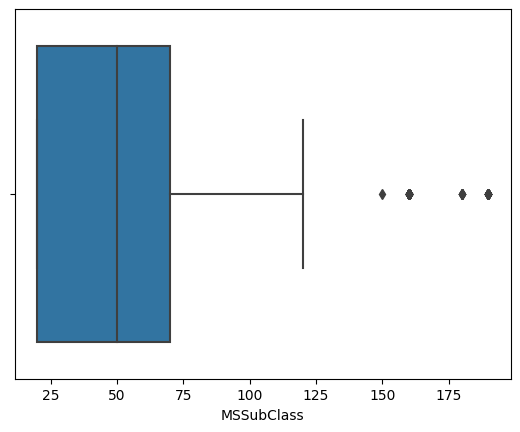

In [80]:
sns.boxplot(x=df["MSSubClass"])
# Se observan que hay datos atípicos

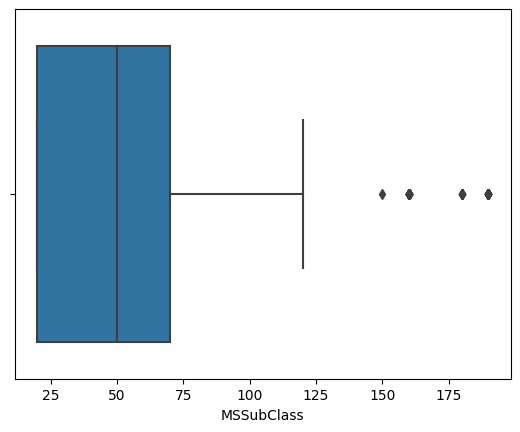

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

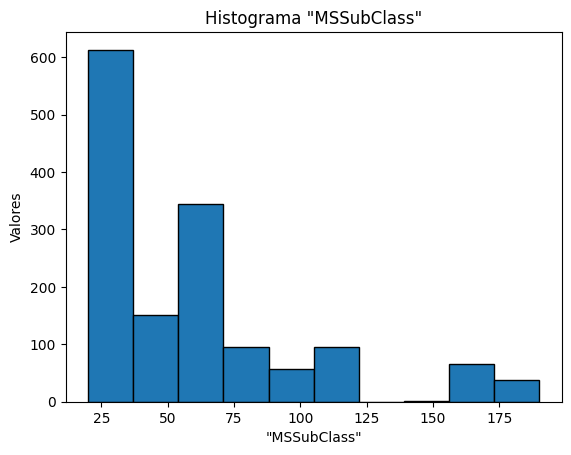

In [81]:
plt.hist(df["MSSubClass"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

# Se observa que la variable genera un sesgo positivo al tener una cola de distribución 

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# LotArea

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='LotArea'>

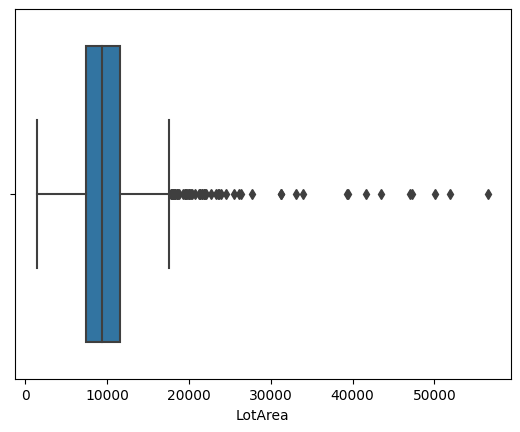

In [66]:
sns.boxplot(x=df['LotArea'])

# Se observan que hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

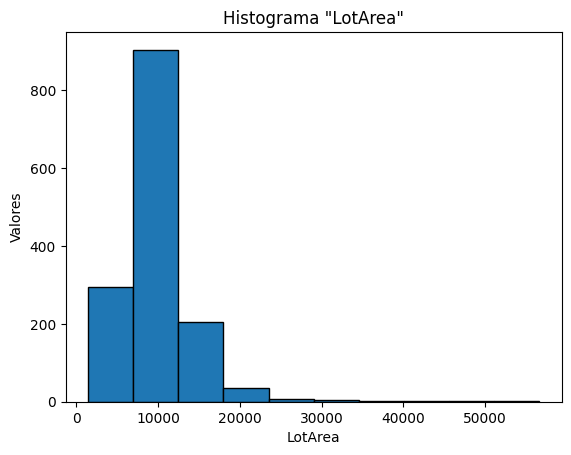

In [85]:
plt.hist(df['LotArea'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('LotArea')
plt.ylabel('Valores')
plt.title('Histograma "LotArea"')
plt.show()

#Sesgo positivo al estar a la derecha, se puede observar que se tienen outliers por lo que se puede ver modificado

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [94]:
# Prueba de Anderson-Darling
resultado = anderson(df['LotArea'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 43.223838001171316
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [100]:
print("Media:",statistics.mean(df['LotArea']))
print("Mediana:",statistics.median(df['LotArea']))

Media: 9819.161069225496
Mediana: 9399


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [103]:
statistics.stdev(df['LotArea'])

4955.51732692645

In [105]:
iqr(df['LotArea'])

4126.5

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 4216.5

#  OverallQual

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='OverallQual'>

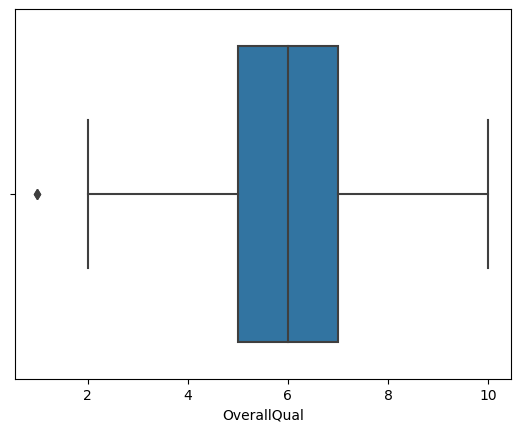

In [113]:
sns.boxplot(x=df['OverallQual'])
# Se observan que hay pocos datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

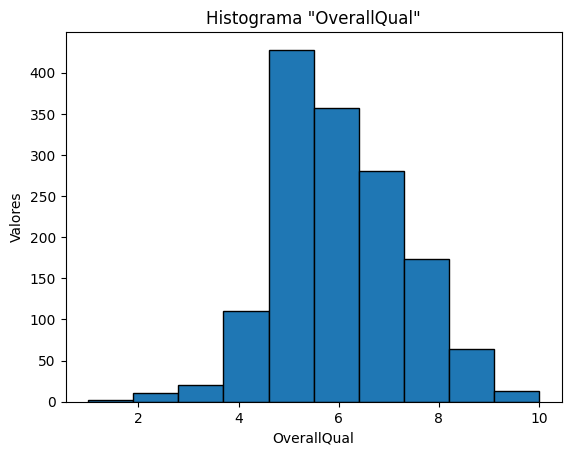

In [126]:
plt.hist(df['OverallQual'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('OverallQual')
plt.ylabel('Valores')
plt.title('Histograma "OverallQual"')
plt.show()

# Se observa un sesgo negativo al estar a la izquierda

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [130]:
# Prueba de Anderson-Darling
resultado = anderson(df['OverallQual'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 36.47170785831577
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [133]:
print("Media:",statistics.mean(df['OverallQual']))
print("Mediana:",statistics.median(df['OverallQual']))

Media: 6.078821110349555
Mediana: 6


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [136]:
statistics.stdev(df['OverallQual'])

1.4368116404730185

In [137]:
iqr(df['OverallQual'])

2.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 2.0

# OverallCond

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='OverallCond'>

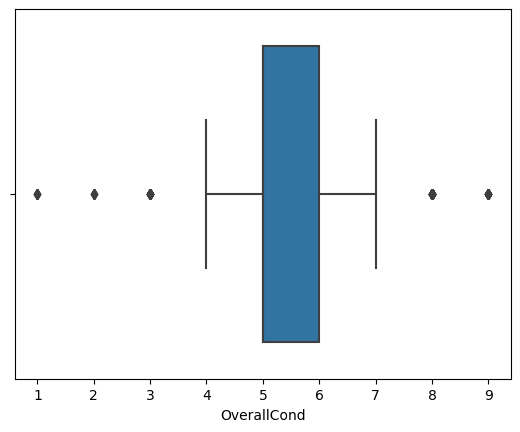

In [140]:
sns.boxplot(x=df["OverallCond"])

# Se observan que hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

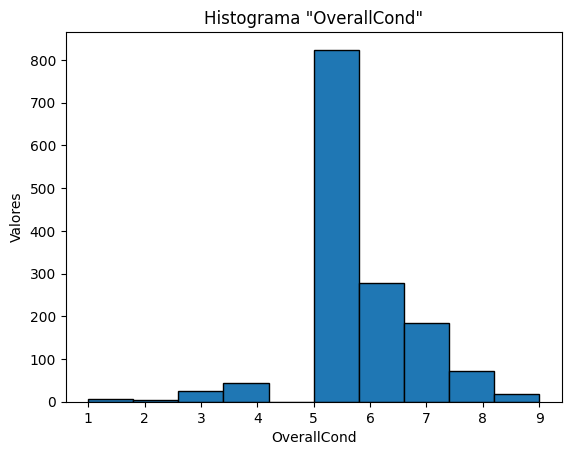

In [150]:
plt.hist(df["OverallCond"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('OverallCond')
plt.ylabel('Valores')
plt.title('Histograma "OverallCond"')
plt.show()

#Se observa que sigue una distribución con sesgo negativo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [151]:
# Prueba de Anderson-Darling
resultado = anderson(df["OverallCond"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 124.4108414679381
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [154]:
print("Media:",statistics.mean(df["OverallCond"]))
print("Mediana:",statistics.median(df["OverallCond"]))

Media: 5.5538039753255655
Mediana: 5


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [156]:
statistics.stdev(df["OverallCond"])

1.1137396032892084

In [157]:
iqr(df["OverallCond"])

1.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 1.0

#  YearBuilt

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='YearBuilt'>

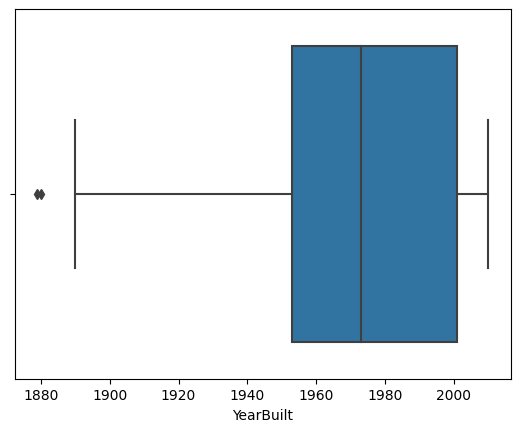

In [11]:
sns.boxplot(x=df['YearBuilt'])

# Se observan valores atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

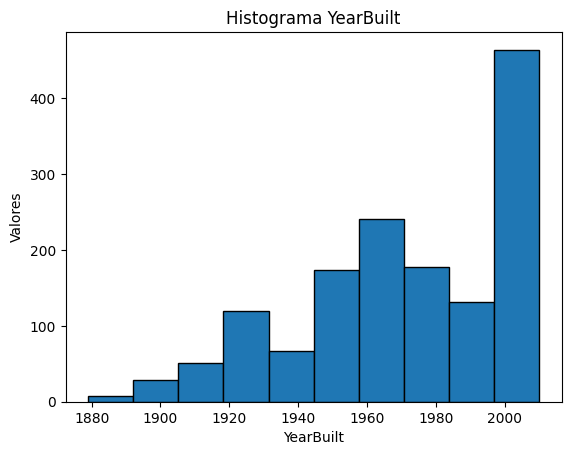

In [14]:
plt.hist(df['YearBuilt'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('YearBuilt')
plt.ylabel('Valores')
plt.title('Histograma YearBuilt')
plt.show()

#Se puede observar que en la variable hay un sesgo negativo al estar a la izquierda

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [15]:
# Prueba de Anderson-Darling
resultado = anderson(df['YearBuilt'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 33.33856503143511
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [16]:
print("Media:",statistics.mean(df['YearBuilt']))
print("Mediana:",statistics.median(df['YearBuilt']))

Media: 1971.357779300891
Mediana: 1973


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [17]:
statistics.stdev(df['YearBuilt'])

30.39007083720525

In [18]:
iqr(df['YearBuilt'])

48.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 48.0

#  YearRemodAdd

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='YearRemodAdd'>

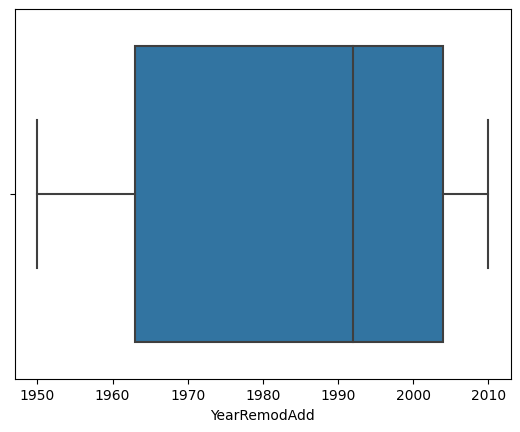

In [19]:
sns.boxplot(x=df['YearRemodAdd'])

#Se puede observar que no hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

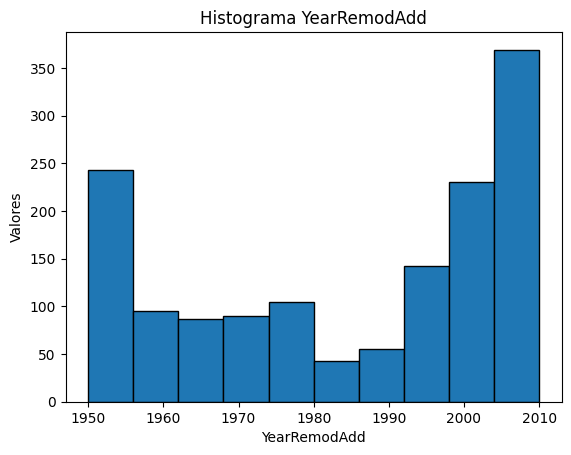

In [21]:
plt.hist(df['YearRemodAdd'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('YearRemodAdd')
plt.ylabel('Valores')
plt.title('Histograma YearRemodAdd')
plt.show()

# Se puede observar que hay un sesgo negativo la cual es a la izquierda

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [22]:
# Prueba de Anderson-Darling
resultado = anderson(df['YearRemodAdd'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 71.40717512393667
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [23]:
print("Media:",statistics.mean(df['YearRemodAdd']))
print("Mediana:",statistics.median(df['YearRemodAdd']))

Media: 1983.6627827278958
Mediana: 1992


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [24]:
statistics.stdev(df['YearRemodAdd'])

21.13046690817047

In [25]:
iqr(df['YearRemodAdd'])

41.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 41.0

#  1stFlrSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='1stFlrSF'>

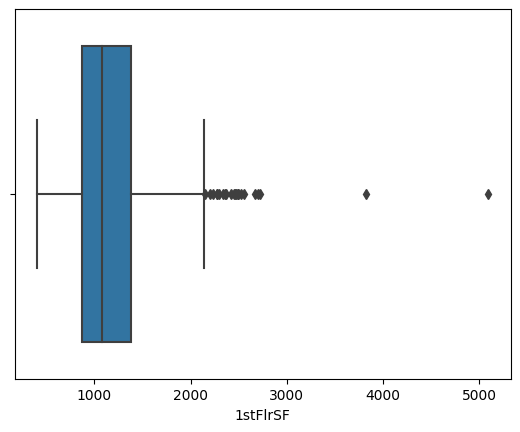

In [27]:
sns.boxplot(x=df['1stFlrSF'])

#Se puede observar que se encuentran datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

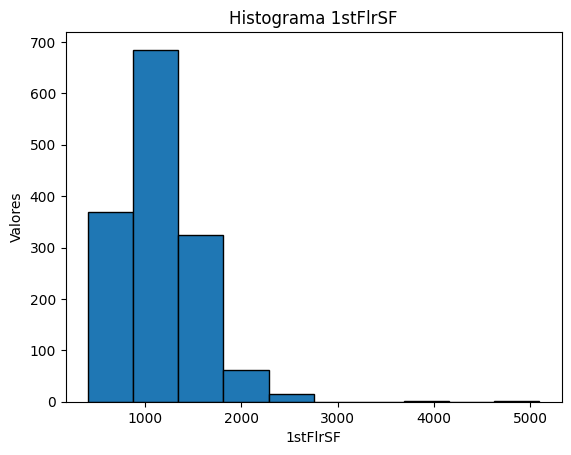

In [28]:
plt.hist(df['1stFlrSF'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('1stFlrSF')
plt.ylabel('Valores')
plt.title('Histograma 1stFlrSF')
plt.show()

#Se puede observar que en la variable se tiene un sesgo positivo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [29]:
# Prueba de Anderson-Darling
resultado = anderson(df['1stFlrSF'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 17.94593770474694
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [30]:
print("Media:",statistics.mean(df['1stFlrSF']))
print("Mediana:",statistics.median(df['1stFlrSF']))

Media: 1156.534612748458
Mediana: 1079


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [31]:
statistics.stdev(df['1stFlrSF'])

398.165819592379

In [32]:
iqr(df['1stFlrSF'])

509.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 509.0

# 2ndFlrSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["2ndFlrSF"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

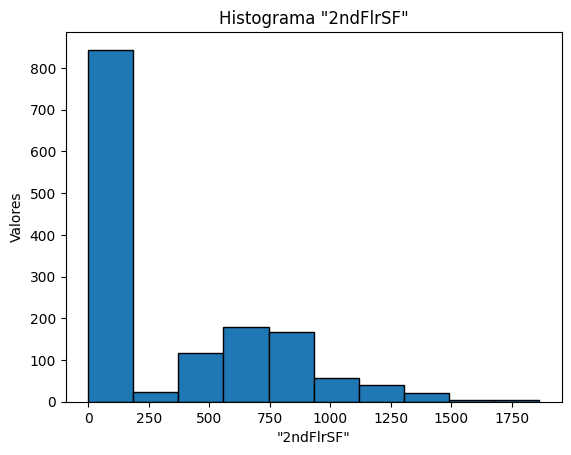

In [111]:
plt.hist(df["2ndFlrSF"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"2ndFlrSF"')
plt.ylabel('Valores')
plt.title('Histograma "2ndFlrSF"')
plt.show()

 Sesgo positivo es a la derecha (cargado a la izquierda)

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [112]:
# Prueba de Anderson-Darling
resultado = anderson(df["2ndFlrSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 155.15808181535726
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [114]:
print("Mediana:",statistics.median(df["2ndFlrSF"]))

Mediana: 0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

In [115]:
iqr(df["2ndFlrSF"])

676.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 676.0

# LowQualFinSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["LowQualFinSF"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

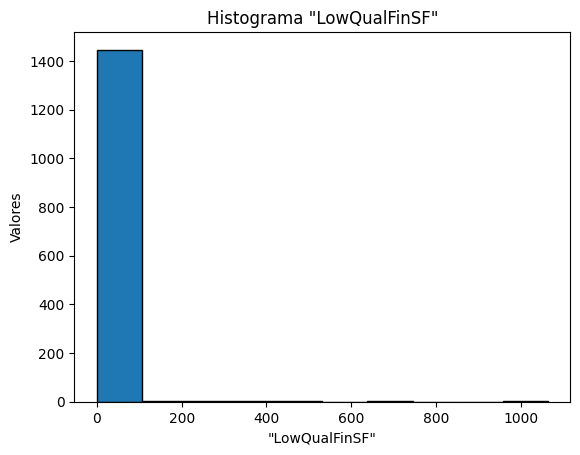

In [116]:
plt.hist(df["LowQualFinSF"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"LowQualFinSF"')
plt.ylabel('Valores')
plt.title('Histograma "LowQualFinSF"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [117]:
# Prueba de Anderson-Darling
resultado = anderson(df["LowQualFinSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 551.466490208049
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [128]:
print("Mediana:",statistics.median(df["LowQualFinSF"]))

Mediana: 0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

In [132]:
iqr(df["LowQualFinSF"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# GrLivArea

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["GrLivArea"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["GrLivArea"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"GrLivArea"')
plt.ylabel('Valores')
plt.title('Histograma "GrLivArea"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# HalfBath

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# BedroomAbvGr

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["MSSubClass"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["MSSubClass"], bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darlingresultado = anderson(df["MSSubClass"])

int("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resul ado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:*
 Si se sigue una distribución normal, entonces se ocupa una desviación estándar.* Si  no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["MSSubClass"])

In [ ]:
iqr(df["MSSubClass"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# KitchenAbvGr

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
df["KitchenAbvGr"].value_counts()

<Axes: xlabel='KitchenAbvGr'>

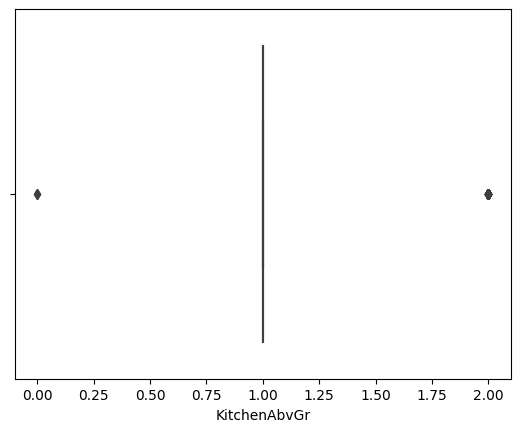

In [73]:
sns.boxplot(x=df["KitchenAbvGr"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

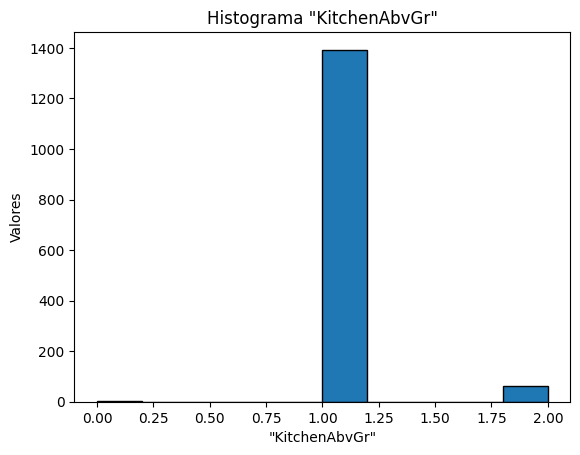

In [87]:
plt.hist(df["KitchenAbvGr"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"KitchenAbvGr"')
plt.ylabel('Valores') 
plt.title('Histograma "KitchenAbvGr"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["KitchenAbvGr"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["KitchenAbvGr"]))
print("Mediana:",statistics.median(df["KitchenAbvGr"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["KitchenAbvGr"])

In [ ]:
iqr(df["KitchenAbvGr"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# TotRmsAbvGrd

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["TotRmsAbvGrd"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

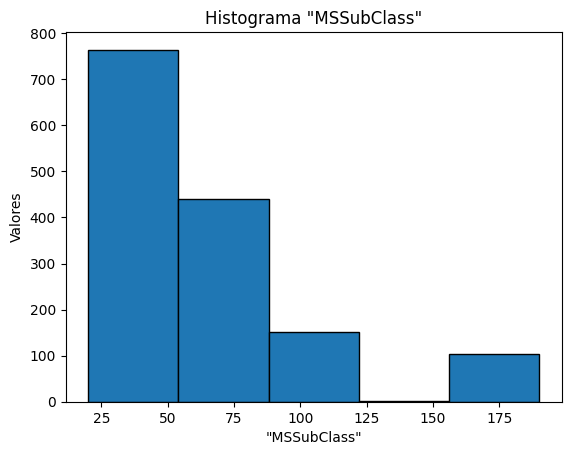

In [82]:
plt.hist(df["TotRmsAbvGrd"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"TotRmsAbvGrd"')
plt.ylabel('Valores')
plt.title('Histograma "TotRmsAbvGrd"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["TotRmsAbvGrd"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["TotRmsAbvGrd"]))
print("Mediana:",statistics.median(df["TotRmsAbvGrd"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["TotRmsAbvGrd"])

In [ ]:
iqr(df["TotRmsAbvGrd"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# Fireplaces

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["Fireplaces"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["Fireplaces"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"Fireplaces"')
plt.ylabel('Valores')
plt.title('Histograma "Fireplaces"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["Fireplaces"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["Fireplaces"]))
print("Mediana:",statistics.median(df["Fireplaces"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["Fireplaces"])

In [ ]:
iqr(df["Fireplaces"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# WoodDeckSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["WoodDeckSF"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["WoodDeckSF"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"WoodDeckSF"')
plt.ylabel('Valores')
plt.title('Histograma "WoodDeckSF"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["WoodDeckSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["WoodDeckSF"]))
print("Mediana:",statistics.median(df["WoodDeckSF"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["WoodDeckSF"])

In [ ]:
iqr(df["WoodDeckSF"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

In [ ]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

# OpenPorchSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["OpenPorchSF"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["OpenPorchSF"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"OpenPorchSF"')
plt.ylabel('Valores')
plt.title('Histograma "OpenPorchSF"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["OpenPorchSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["OpenPorchSF"]))
print("Mediana:",statistics.median(df["OpenPorchSF"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["OpenPorchSF"])

In [ ]:
iqr(df["OpenPorchSF"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# EnclosedPorch

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [ ]:
sns.boxplot(x=df["EnclosedPorch"])

![image.png](attachment:image.png)

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [ ]:
plt.hist(df["EnclosedPorch"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"EnclosedPorch"')
plt.ylabel('Valores')
plt.title('Histograma "EnclosedPorch"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [ ]:
# Prueba de Anderson-Darling
resultado = anderson(df["EnclosedPorch"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [ ]:
print("Media:",statistics.mean(df["EnclosedPorch"]))
print("Mediana:",statistics.median(df["EnclosedPorch"]))

Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [ ]:
statistics.stdev(df["EnclosedPorch"])

In [ ]:
iqr(df["EnclosedPorch"])

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# 3SsnPorch

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='3SsnPorch'>

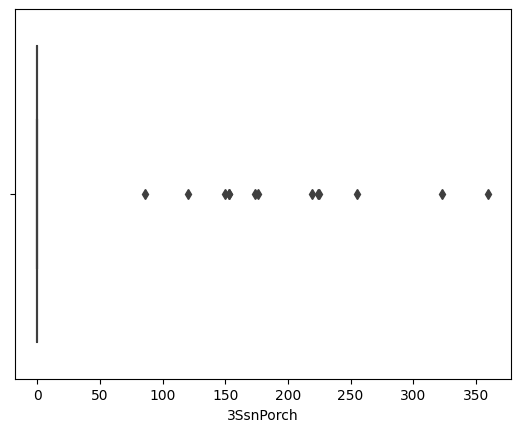

In [139]:
sns.boxplot(x=df["3SsnPorch"])

De acuerdo a la visualización del Bloxplot, se nota que la variable 3SsnPorch <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

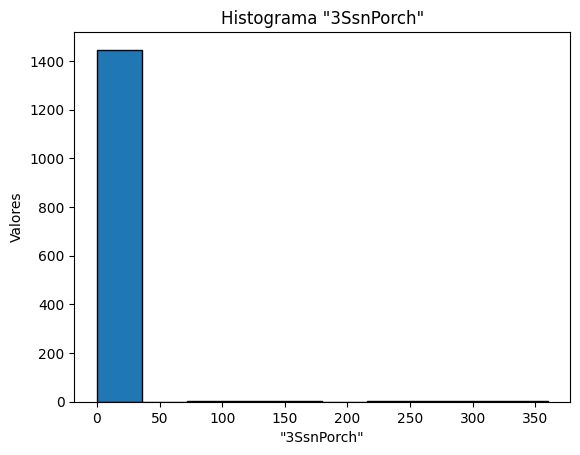

In [138]:
plt.hist(df["3SsnPorch"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"3SsnPorch"')
plt.ylabel('Valores')
plt.title('Histograma "3SsnPorch"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable 3SsnPorch <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [140]:
# Prueba de Anderson-Darling
resultado = anderson(df["3SsnPorch"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 555.292377036182
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [141]:
print("Media:",statistics.mean(df["3SsnPorch"]))
print("Mediana:",statistics.median(df["3SsnPorch"]))

Media: 1.794379712131597
Mediana: 0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [142]:
statistics.stdev(df["3SsnPorch"])

20.2078417514965

In [143]:
iqr(df["3SsnPorch"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# ScreenPorch

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='ScreenPorch'>

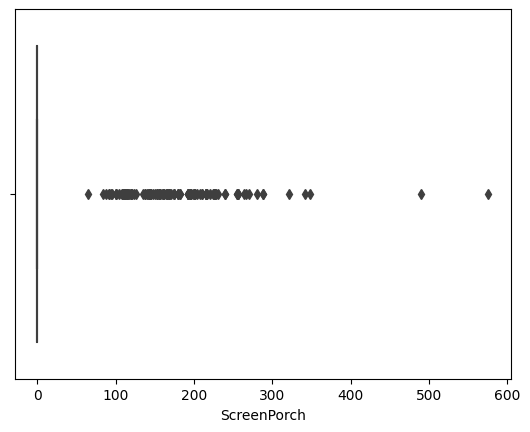

In [144]:
sns.boxplot(x=df["ScreenPorch"])

De acuerdo a la visualización del Boxplot, se nota que la variable ScreenPorch <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

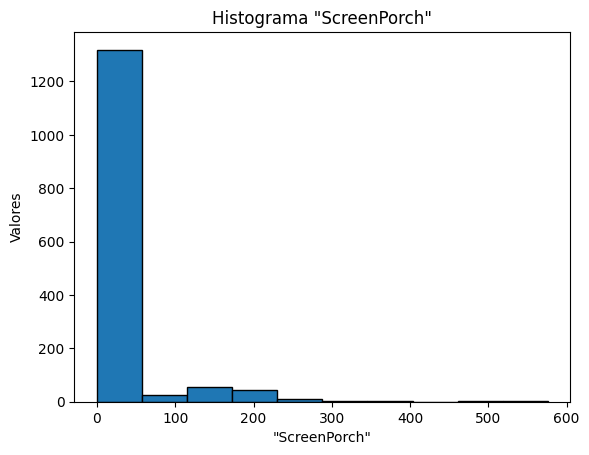

In [152]:
plt.hist(df["ScreenPorch"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"ScreenPorch"')
plt.ylabel('Valores')
plt.title('Histograma "ScreenPorch"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable ScreenPorch <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [147]:
# Prueba de Anderson-Darling
resultado = anderson(df["ScreenPorch"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 450.6010696243061
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [148]:
print("Media:",statistics.mean(df["ScreenPorch"]))
print("Mediana:",statistics.median(df["ScreenPorch"]))

Media: 17.064427690198766
Mediana: 0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [149]:
statistics.stdev(df["ScreenPorch"])

56.60976290691056

In [153]:
iqr(df["ScreenPorch"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# PoolArea

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='PoolArea'>

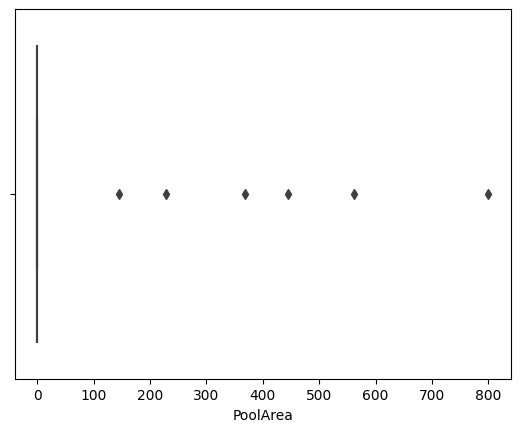

In [154]:
sns.boxplot(x=df["PoolArea"])

De acuerdo a la visualización del Boxplot, se nota que la variable PoolArea <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

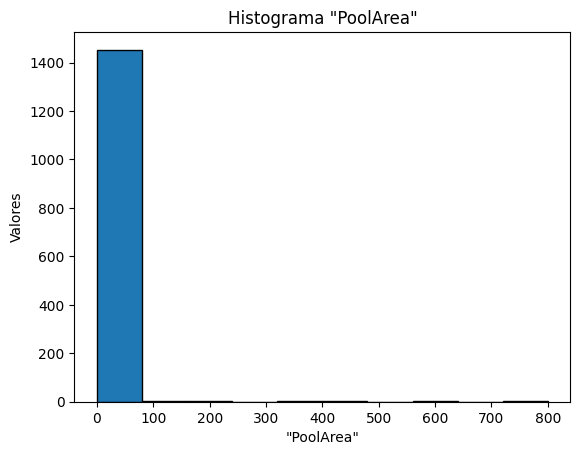

In [155]:
plt.hist(df["PoolArea"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"PoolArea"')
plt.ylabel('Valores')
plt.title('Histograma "PoolArea"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable PoolArea <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [157]:
# Prueba de Anderson-Darling
resultado = anderson(df["PoolArea"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 559.3828759259168
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [158]:
print("Media:",statistics.mean(df["PoolArea"]))
print("Mediana:",statistics.median(df["PoolArea"]))

Media: 1.7443454420836189
Mediana: 0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [159]:
statistics.stdev(df["PoolArea"])

30.491646305342066

In [160]:
iqr(df["PoolArea"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# MiscVal

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='MiscVal'>

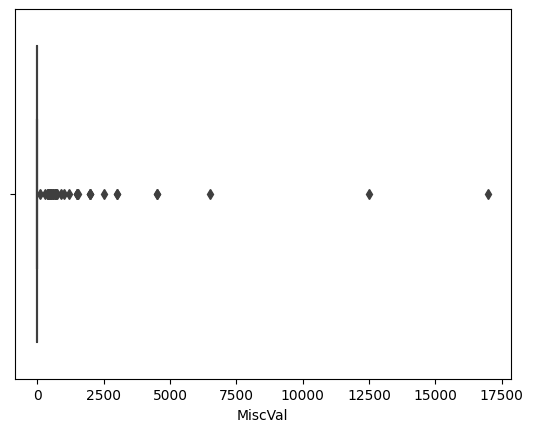

In [161]:
sns.boxplot(x=df["MiscVal"])

De acuerdo a la visualización del Boxplot, se nota que la variable MiscVal <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

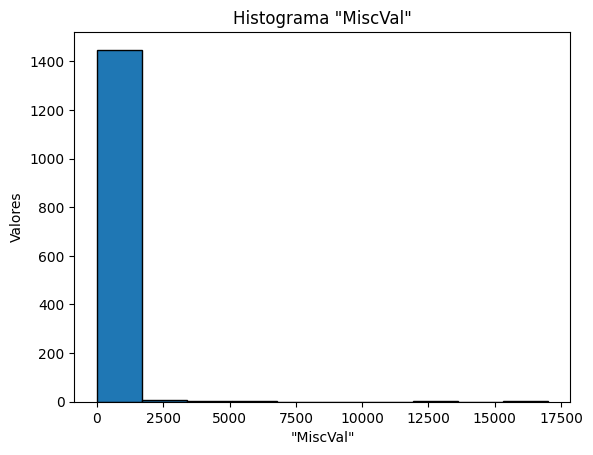

In [163]:
plt.hist(df["MiscVal"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MiscVal"')
plt.ylabel('Valores')
plt.title('Histograma "MiscVal"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable MiscVal <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [164]:
# Prueba de Anderson-Darling
resultado = anderson(df["MiscVal"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 516.894536926304
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [165]:
print("Media:",statistics.mean(df["MiscVal"]))
print("Mediana:",statistics.median(df["MiscVal"]))

Media: 58.16792323509253
Mediana: 0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [166]:
statistics.stdev(df["MiscVal"])

630.806977589708

In [167]:
iqr(df["MiscVal"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# MoSold

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='MoSold'>

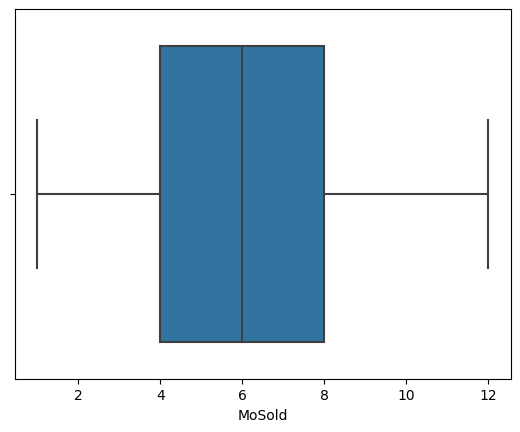

In [168]:
sns.boxplot(x=df["MoSold"])

De acuerdo a la visualización del Boxplot, se nota que la variable MoSold <strong>no</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

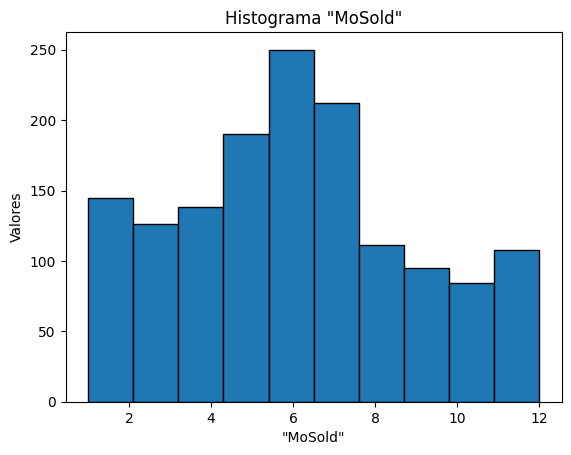

In [170]:
plt.hist(df["MoSold"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MoSold"')
plt.ylabel('Valores')
plt.title('Histograma "MoSold"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable MoSold <strong>sí</strong> presenta un muy leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [173]:
# Prueba de Anderson-Darlingresultado
resultado = anderson(df["MoSold"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 11.569046082008299
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [174]:
print("Media:",statistics.mean(df["MoSold"]))
print("Mediana:",statistics.median(df["MoSold"]))

Media: 6.104180945853324
Mediana: 6


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
 * Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
 * Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [175]:
statistics.stdev(df["MoSold"])

2.722431901250806

In [176]:
iqr(df["MoSold"])

4.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 4.0

# YrSold

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='YrSold'>

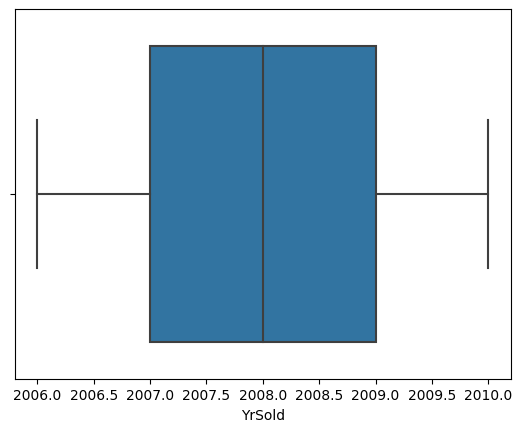

In [177]:
sns.boxplot(x=df["YrSold"])

De acuerdo a la visualización del Boxplot, se nota que la variable YrSold <strong>no</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

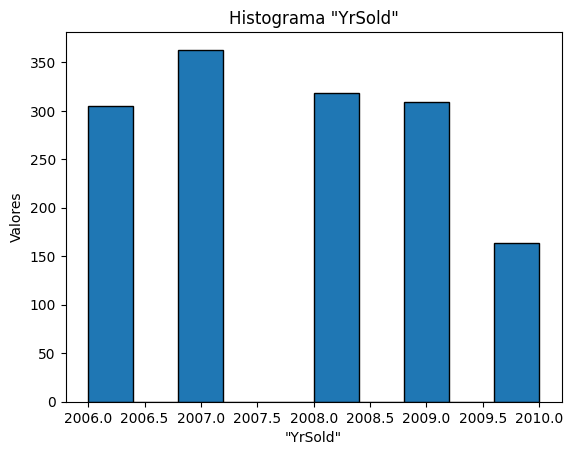

In [179]:
plt.hist(df["YrSold"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"YrSold"')
plt.ylabel('Valores')
plt.title('Histograma "YrSold"')
plt.show()

De acuerdo a la visualización del Boxplot, se nota que la variable YrSold <strong>sí</strong> presenta un sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [180]:
# Prueba de Anderson-Darling
resultado = anderson(df["YrSold"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 49.43594539705873
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [181]:
print("Media:",statistics.mean(df["YrSold"]))
print("Mediana:",statistics.median(df["YrSold"]))

Media: 2007.7697052775875
Mediana: 2008


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [182]:
statistics.stdev(df["YrSold"])

1.301740149380236

In [183]:
iqr(df["YrSold"])

2.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 2.0